In [57]:
import numpy as np
from pylab import plot,show,imshow,hot
from numba import jit

In [17]:
def f(o,x,m):
    return np.cos( (m*o) - (x*np.sin(o)))

def simpson(a,b,m,x,n):
    h = (b-a)/n
    o = np.linspace(a,b-h,n)
    fo = f(o,x,m)
    s = (1/3)*h*(f(a,x,m)+f(b,x,m)+4*np.sum(fo[1::2])+2*np.sum(fo[2:n-1:2]))
    return s

def J(m,x):
    return (1/np.pi) * simpson(0,np.pi,m,x,1000)

In [18]:
def Bessel(x1,m1):
    x = np.linspace(0,x1,1000)
    for m in range(m1+1):
        Jm = list(map(lambda x: J(m,x) ,x))
        plot(x,Jm)
    show()

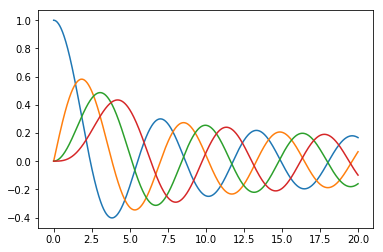

In [37]:
Bessel(20,3)

C:\Users\leona\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


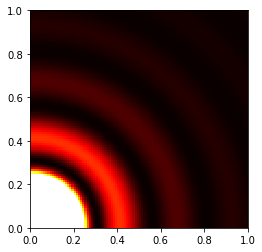

In [67]:
def difrac(lamda,r):
    r *= 100
    lamda /= 10
    k = ( 2 * np.pi ) / lamda
    data = np.zeros([r,r])
    for i in range(r):
        for j in range(r):
            kr = k * np.sqrt(i**2+j**2)
            data[i,j] = (J(1,kr)/(kr))**2
    imshow(data,vmax=0.01,origin="lower",extent=[0,1,0,1])
difrac(500,1)